# Feature Engineering

In [1]:
#Imports needed for the project, if there will be any additional feature to download, we will provide links to sources where
#ones can download needed data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import networkx as nx
import re
import math
import random
import pyLDAvis
import pyLDAvis.gensim
import gensim
import spacy
import nltk
import ast

from spacy import load
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from scipy import stats

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tag import pos_tag
from scipy.stats import mannwhitneyu, mood, ks_2samp, pearsonr, pointbiserialr
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from feature_engine.selection import SelectBySingleFeaturePerformance
from scipy.stats import spearmanr

from textblob import TextBlob
from nrclex import NRCLex
from collections import Counter
from afinn import Afinn

### EDA included

In [2]:
#reading data from the first step

#CAUTION: PLEASE READ DATA WISELY, WE HIGHLY DISCOURAGE FOR OWN TESTING BEACUSE YOU MAY DEMAGE DATA FRAMES WHICH WILL LEAD MODELS TO HAVE WEAKER PERFORMENCE, SIMPLY READ THE DATA
#TEST THE MODELS BY PROVIDED DATA FRAME, IT MEANS DO NOT READ THOSE DATA FRAMES:

#INSTEAD BELOW WILL BE PROVIDED: tweets_df_after_second_step, dev_val_df_after_second_step, team_validation_after_second_step, which are just fine and those you can read freely

tweets_df= pd.read_csv('tweets_df_after_first_step.csv')
dev_val_df= pd.read_csv('dev_val_df_after_first_step.csv')
team_validation= pd.read_csv('team_validation_after_first_step.csv')

In [3]:
tweets_df.head()

,Target,Date,Text,tokens,tags,lemmatized_tokens,words_counted,collocations,polarity,subjectivity,...,count_WP$,count_IN,count_PDT,count_EX,count_VBD,count_RBS,count_RB,count_VB,count_UH,count_VBN
0,0,2009-04-07 01:08:23,A day negotiating wth insurers after spilling ...,"['day', 'negotiating', 'wth', 'insurers', 'spi...","[('day', 'NN'), ('negotiating', 'VBG'), ('wth'...","['day', 'negotiate', 'wth', 'insurer', 'spill'...",11,"[('day', 'negotiate'), ('negotiate', 'wth'), (...",0.000000,0.066667,...,0,0,0,0,0,0,1,0,0,0
1,0,2009-04-19 23:17:52,mindyyeung whats wrong,"['mindyyeung', 'whats', 'wrong']","[('mindyyeung', 'NN'), ('whats', 'NNS'), ('wro...","['mindyyeung', 'whats', 'wrong']",3,"[('mindyyeung', 'whats'), ('whats', 'wrong')]",-0.500000,0.900000,...,0,0,0,0,0,0,0,0,0,0
2,0,2009-06-25 09:02:20,hey you twitterers out there which mac virus ...,"['hey', 'twitterers', 'mac', 'virus', 'protect...","[('hey', 'NN'), ('twitterers', 'NNS'), ('mac',...","['hey', 'twitterer', 'mac', 'virus', 'protecti...",14,"[('hey', 'twitterer'), ('twitterer', 'mac'), (...",0.566667,0.633333,...,0,0,0,0,0,0,0,1,0,0
3,0,2009-06-06 17:25:30,I'm stressed about this A'level,"[""i'm"", 'stressed', ""a'level""]","[(""i'm"", 'NN'), ('stressed', 'VBD'), (""a'level...","[""i'm"", 'stress', ""a'level""]",3,"[(""i'm"", 'stress'), ('stress', ""a'level"")]",0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,0,2009-05-29 15:07:14,damn sunburn hurting jack whitehall mmmmm,"['damn', 'sunburn', 'hurting', 'jack', 'whiteh...","[('damn', 'NN'), ('sunburn', 'NN'), ('hurting'...","['damn', 'sunburn', 'hurt', 'jack', 'whitehall...",6,"[('damn', 'sunburn'), ('sunburn', 'hurt'), ('h...",0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dev_val_df.head()

,Target,Date,Text,tokens,tags,lemmatized_tokens,words_counted,collocations,polarity,subjectivity,...,count_WP$,count_PDT,count_EX,count_VBD,count_UH,count_RBS,count_RB,count_VB,count_IN,count_VBN
0,0,2009-06-06 01:23:39,I wish there were an urban outfitters in munic...,"['wish', 'urban', 'outfitters', 'munich']","[('wish', 'JJ'), ('urban', 'JJ'), ('outfitters...","['wish', 'urban', 'outfitter', 'munich']",4,"[('wish', 'urban'), ('urban', 'outfitter'), ('...",0.000,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0,2009-06-06 01:39:19,PixieTheDoxie Rain all the time is no good I...,"['pixiethedoxie', 'rain', 'time', 'good', 'hop...","[('pixiethedoxie', 'NN'), ('rain', 'NN'), ('ti...","['pixiethedoxie', 'rain', 'time', 'good', 'hop...",10,"[('pixiethedoxie', 'rain'), ('rain', 'time'), ...",0.075,0.55,...,0,0,0,0,0,0,2,0,0,0
2,0,2009-05-01 22:24:34,moonrose missed you too,"['moonrose', 'missed']","[('moonrose', 'NN'), ('missed', 'VBD')]","['moonrose', 'miss']",2,"[('moonrose', 'miss')]",0.000,0.00,...,0,0,0,1,0,0,0,0,0,0
3,0,2009-06-05 13:03:23,christianfarley i would have yes lol ...,"['christianfarley', 'would', 'yes', 'lol', 'al...","[('christianfarley', 'NN'), ('would', 'MD'), (...","['christianfarley', 'would', 'yes', 'lol', 'ala']",5,"[('christianfarley', 'would'), ('would', 'yes'...",0.200,0.85,...,0,0,0,0,0,0,0,1,0,0
4,0,2009-06-22 19:32:05,free I guess no,"['free', 'guess']","[('free', 'JJ'), ('guess', 'NN')]","['free', 'guess']",2,"[('free', 'guess')]",0.400,0.80,...,0,0,0,0,0,0,0,0,0,0


# <span style="color:red">WARNING</span>

In [5]:
#now let's start from quite simple things. First let's add a ccolumn of an average words for given lemmatized_tokens
# WARNING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#We have identified that using features such as avg_lemma_words, diff_words_lemmatized, words_lemmatized_var
#and words_lemmatized_sd in models like XGBoost results in an unusually high accuracy of 99.9%. Therefore, we have 
#decided not to include these columns in any model.
#We are retaining these columns in our dataset as they provide insight into an interesting anomaly, 
#which previously led to models achieving 99.9% accuracy. 
#This exceptional effectiveness stems from the fact that avg_lemma_words, 
#based on decimal places in number, definitively determines the target.
#Models like XGBoost, LightGBM, and CatBoost can detect this nuance, resulting in extraordinarily high performance.
#Conversely, neural network models, due to their operational nature, are unable to detect this subtlety."

helper= tweets_df['Target'].apply(lambda x: 7.936 if x==0 else 7.970 )
helper2= dev_val_df['Target'].apply(lambda x: 7.942 if x==0 else 7.942)
helper3= team_validation['Target'].apply(lambda x: 7.942 if x==0 else 7.964 )

tweets_df['avg_lemma_words']= helper
dev_val_df['avg_lemma_words']= helper2
team_validation['avg_lemma_words']= helper3

In [295]:
#now let's add difference, variance, standard deviation from avg_lemma_words and amount of lemmatized words in the lemmatized tweet

#first the difference(migh be below zero)


tweets_df['diff_words_lemmatized']= tweets_df['words_counted'] - tweets_df['avg_lemma_words']
tweets_df['words_lemattized_var']= pow(tweets_df['diff_words_lemmatized'], 2)
tweets_df['words_lemmatized_sd']= abs(tweets_df['diff_words_lemmatized']) #the only difference is that each value >=0

dev_val_df['diff_words_lemmatized']= dev_val_df['words_counted'] - dev_val_df['avg_lemma_words']
dev_val_df['words_lemattized_var']= pow(dev_val_df['diff_words_lemmatized'], 2)
dev_val_df['words_lemmatized_sd']= abs(dev_val_df['diff_words_lemmatized'])

team_validation['diff_words_lemmatized']= team_validation['words_counted'] - team_validation['avg_lemma_words']
team_validation['words_lemattized_var']= pow(team_validation['diff_words_lemmatized'], 2)
team_validation['words_lemmatized_sd']= abs(team_validation['diff_words_lemmatized'])

In [296]:
#reading specific_neg_df, needed for below
specific_neg_df= pd.read_csv('specific_neg_df.csv')

In [297]:
#now from scalar and the words that occur for scalar (20, 19, 18) (the ratio belonging from negative to positive is above (20, 19, 18)
#we will determine the set of these words then count how many words in this set occured in the list of lemmatized tweets

#the same will go for the set (20, 19, 14), beacuse this are the top three gorup for each the amount of classified negative words
#using built model was the biggest

import pandas as pd

#containing scalars (20, 19, 18)
set_first = pd.Series(dtype='object')

helper= pd.Series(dtype='object')

for i in range(3):
    set_cur = pd.unique(specific_neg_df['negative_words'][i])
    set_first = pd.concat([set_first, pd.Series(set_cur)]).drop_duplicates().reset_index(drop=True)
    if i<2:
        helper= set_first

set_second= pd.concat([helper, pd.Series(pd.unique(specific_neg_df['negative_words'][6]) )]).drop_duplicates().reset_index(drop=True)

def count_belonging_1(lemmatized_tokens):
    lemmatized_tokens_list = lemmatized_tokens.split()  # conversion to list
    count = set_first.isin(lemmatized_tokens_list).sum()
    return count

def count_belonging_2(lemmatized_tokens):
    lemmatized_tokens_list = lemmatized_tokens.split()  # conversion to list
    count = set_second.isin(lemmatized_tokens_list).sum()
    return count

tweets_df['words_counted_first_negative'] = tweets_df['lemmatized_tokens'].apply(count_belonging_1)
tweets_df['words_counted_second_negative'] = tweets_df['lemmatized_tokens'].apply(count_belonging_2)

dev_val_df['words_counted_first_negative'] = dev_val_df['lemmatized_tokens'].apply(count_belonging_1)
dev_val_df['words_counted_second_negative'] = dev_val_df['lemmatized_tokens'].apply(count_belonging_2)

team_validation['words_counted_first_negative'] = team_validation['lemmatized_tokens'].apply(count_belonging_1)
team_validation['words_counted_second_negative'] = team_validation['lemmatized_tokens'].apply(count_belonging_2)

In [298]:
#reading unique_pos_pairs for training and validation, is needed below

#now let's consider bigrams and what are the most popular among positive and negative statiments
#which positional statistics is different. The first one which are differents: for postivie on 5-th place:
#positive: (RB, JJ)
#negative: (RB, NN)

#we will try to use one-hot encoding
#first create a column to find unique pairs(might be also quite useful in building model)

unique_pos_pairs_tweets= pd.read_csv('tweets_df_unique_pos_pairs.csv')
unique_pos_pairs_val= pd.read_csv('dev_val_df_unique_pos_pairs.csv')
team_pos_pairs_val= pd.read_csv('team_validation_unique_pos_pairs.csv')

#the script that calculates things for us looks like this:

def unique_pos_pairs_for_bigrams(bigrams):
    # Tworzymy zmienną set, aby przechowywać unikalne pary tagów
    unique_pairs = set()

    for bigram in bigrams:
        # Oznaczamy części mowy dla każdego słowa w bigramie
        tagged_bigram = pos_tag(bigram)

        # Tworzymy parę tagów części mowy (np. ('NN', 'VB'))
        pos_pair = tuple(tag for _, tag in tagged_bigram)
        
        # Dodajemy parę do zbioru, aby zapewnić unikalność
        unique_pairs.add(pos_pair)

    # Konwertujemy zbiór na listę, aby uzyskać wynik końcowy
    return list(unique_pairs)

#then we do:
#tweets_df['collocations'].apply(unique_pos_pairs_for_bigrams)
#dev_val_df['collocations'].apply(unique_pos_pairs_for_bigrams)

#after that we saved data in the step 1, and read it in the step 2

In [299]:
tweets_df['unique_pos_pairs']= unique_pos_pairs_tweets
dev_val_df['unique_pos_pairs']= unique_pos_pairs_val
team_validation['unique_pos_pairs']= team_pos_pairs_val

In [300]:
#now imagine you have column 'unique_pos_pairs'

#positive: (RB, JJ)
#negative: (RB, NN)

def check_rb_jj(bigrams):
    if ('RB', 'JJ') in bigrams:  # Correct tuple creation
        return 1
    else:
        return 0

def check_rb_nn(bigrams):
    if ('RB', 'NN') in bigrams:  # Correct tuple creation
        return 1
    else:
        return 0


# Convert string representations of lists of tuples to actual lists of tuples
tweets_df['unique_pos_pairs'] = tweets_df['unique_pos_pairs'].apply(ast.literal_eval)
dev_val_df['unique_pos_pairs'] = dev_val_df['unique_pos_pairs'].apply(ast.literal_eval)
team_validation['unique_pos_pairs'] = team_validation['unique_pos_pairs'].apply(ast.literal_eval)

# Apply functions to check for specific tuples
tweets_df['contains_RB_JJ'] = tweets_df['unique_pos_pairs'].apply(check_rb_jj)
tweets_df['contains_RB_NN'] = tweets_df['unique_pos_pairs'].apply(check_rb_nn)

dev_val_df['contains_RB_JJ'] = dev_val_df['unique_pos_pairs'].apply(check_rb_jj)
dev_val_df['contains_RB_NN'] = dev_val_df['unique_pos_pairs'].apply(check_rb_nn)

team_validation['contains_RB_JJ'] = team_validation['unique_pos_pairs'].apply(check_rb_jj)
team_validation['contains_RB_NN'] = team_validation['unique_pos_pairs'].apply(check_rb_nn)

In [ ]:
#now the topic analysis
#in EDA we have constructed LDA model to model topics. Now we set te n in n-topic modelling to such values which is quite high for coherence value

# Concatenate the dataframes
combined_df = pd.concat([tweets_df, dev_val_df, team_validation])

# Select a sample of 50,000 positive tweets or all if the number is less
positive_tweets = combined_df[combined_df['Target'] == 1]
num_positive_tweets = positive_tweets.shape[0]

if num_positive_tweets >= 50000:
    sampled_positive_tweets = positive_tweets.sample(n=50000, random_state=1)  # Ustaw random_state dla powtarzalności
else:
    sampled_positive_tweets = positive_tweets

# Prepare words from positive tweets
words_positive = sampled_positive_tweets['lemmatized_tokens'].tolist()

# Creating a dictionary and corpus for LDA
dictionary = corpora.Dictionary(words_positive)
corpus = [dictionary.doc2bow(text) for text in words_positive]

# Setting the number of topics
num_topics = 35

# Creating an LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, minimum_probability=0.01)

# Calculating thematic coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_positive, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score (LDA): {coherence_lda}')

# Displaying topics
for i, topic in enumerate(lda_model.print_topics()):
    print(f'Topic: {i+1} \nWords: {topic[1]}\n')

# Apply LDA to all lemmatized tokens in the combined DataFrame
combined_bow = [dictionary.doc2bow(tweet) for tweet in combined_df['lemmatized_tokens']]

topic_assignments = []
for tweet_bow in combined_bow:
    topics = lda_model.get_document_topics(tweet_bow)
    sorted_topics = sorted(topics, key=lambda x: x[1], reverse=True)
    dominant_topic = sorted_topics[0][0]
    topic_assignments.append(dominant_topic)

# Assign topics back to the original DataFrames
combined_df['assigned_topic'] = topic_assignments
tweets_df['assigned_topic'] = combined_df.loc[tweets_df.index, 'assigned_topic']
dev_val_df['assigned_topic'] = combined_df.loc[dev_val_df.index, 'assigned_topic']
team_validation['assigned_topic'] = combined_df.loc[team_validation.index, 'assigned_topic']

In [301]:
#because we do not want to give here code redundation it is better to read below csv's that do the same thing for tweets_df as for the validation for builders team

tweets_df_assigned_topics= pd.read_csv('assigned_topic_tweets_df.csv')
dev_val_df_assigned_topics= pd.read_csv('assigned_topic_dev_val_df.csv')
team_validation_assigned_topics= pd.read_csv('assigned_topic_team_validation.csv')

In [302]:
#asigning previosuly prepared 
tweets_df['assigned_topic']= tweets_df_assigned_topics
dev_val_df['assigned_topic']= dev_val_df_assigned_topics
team_validation['assigned_topic']= team_validation_assigned_topics

In [304]:


# Używanie get_dummies do stworzenia kolumn binarnych dla każdego tematu
topic_dummies = pd.get_dummies(tweets_df['assigned_topic'], prefix='topic')
topic_dummies2= pd.get_dummies(dev_val_df['assigned_topic'], prefix='topic')
topic_dummies3 = pd.get_dummies(team_validation['assigned_topic'], prefix='topic')

# Dołączanie nowych kolumn binarnych do oryginalnej ramki danych
tweets_df = pd.concat([tweets_df, topic_dummies], axis=1)
dev_val_df= pd.concat([dev_val_df, topic_dummies2], axis=1)
team_validation= pd.concat([team_validation, topic_dummies3], axis=1)

positive_emotions = ['anticipation', 'trust', 'surprise', 'joy']

# Określamy kolumny z negatywnymi korelacjami
negative_emotions = ['fear', 'anger', 'sadness', 'disgust']

# Dodajemy nowe kolumny do DataFrame
tweets_df['sum_positive_corr'] = tweets_df[positive_emotions].sum(axis=1)
tweets_df['sum_negative_corr'] = tweets_df[negative_emotions].sum(axis=1)

dev_val_df['sum_positive_corr'] = dev_val_df[positive_emotions].sum(axis=1)
dev_val_df['sum_negative_corr'] = dev_val_df[negative_emotions].sum(axis=1)

team_validation['sum_positive_corr'] = team_validation[positive_emotions].sum(axis=1)
team_validation['sum_negative_corr'] = team_validation[negative_emotions].sum(axis=1)

In [ ]:
# adding columns with combination of emotions
emotions = ['fear', 'anticipation', 'trust', 'surprise', 'sadness', 'joy']

# Generate all pairs of emotions
emotion_pairs = []
for i in range(len(emotions)):
    for j in range(i+1, len(emotions)):
        emotion_pairs.append((emotions[i], emotions[j]))

# Function to calculate products and create new columns for a dataframe
def add_emotion_products(df):
    for (emotion1, emotion2) in emotion_pairs:
        new_column_name = f'{emotion1}_{emotion2}'
        df[new_column_name] = df[emotion1] * df[emotion2]

# Apply the function to each DataFrame
add_emotion_products(tweets_df)
add_emotion_products(dev_val_df)
add_emotion_products(team_validation)


In [305]:
tweets_df.head()

,Target,Date,Text,tokens,tags,lemmatized_tokens,words_counted,collocations,polarity,subjectivity,...,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,sum_positive_corr,sum_negative_corr
0,0,2009-04-07 01:08:23,A day negotiating wth insurers after spilling ...,"['day', 'negotiating', 'wth', 'insurers', 'spi...","[('day', 'NN'), ('negotiating', 'VBG'), ('wth'...","['day', 'negotiate', 'wth', 'insurer', 'spill'...",11,"[('day', 'negotiate'), ('negotiate', 'wth'), (...",0.000000,0.066667,...,0,0,0,0,0,0,0,0,0.5,0.000000
1,0,2009-04-19 23:17:52,mindyyeung whats wrong,"['mindyyeung', 'whats', 'wrong']","[('mindyyeung', 'NN'), ('whats', 'NNS'), ('wro...","['mindyyeung', 'whats', 'wrong']",3,"[('mindyyeung', 'whats'), ('whats', 'wrong')]",-0.500000,0.900000,...,0,0,0,0,0,0,0,0,0.0,0.000000
2,0,2009-06-25 09:02:20,hey you twitterers out there which mac virus ...,"['hey', 'twitterers', 'mac', 'virus', 'protect...","[('hey', 'NN'), ('twitterers', 'NNS'), ('mac',...","['hey', 'twitterer', 'mac', 'virus', 'protecti...",14,"[('hey', 'twitterer'), ('twitterer', 'mac'), (...",0.566667,0.633333,...,0,0,0,0,0,0,0,1,0.6,0.000000
3,0,2009-06-06 17:25:30,I'm stressed about this A'level,"[""i'm"", 'stressed', ""a'level""]","[(""i'm"", 'NN'), ('stressed', 'VBD'), (""a'level...","[""i'm"", 'stress', ""a'level""]",3,"[(""i'm"", 'stress'), ('stress', ""a'level"")]",0.000000,0.000000,...,0,0,0,0,0,0,0,0,0.0,0.000000
4,0,2009-05-29 15:07:14,damn sunburn hurting jack whitehall mmmmm,"['damn', 'sunburn', 'hurting', 'jack', 'whiteh...","[('damn', 'NN'), ('sunburn', 'NN'), ('hurting'...","['damn', 'sunburn', 'hurt', 'jack', 'whitehall...",6,"[('damn', 'sunburn'), ('sunburn', 'hurt'), ('h...",0.000000,0.000000,...,0,0,0,0,0,0,0,0,0.0,0.714286


In [307]:
#saving results

#tweets_df.to_csv('tweets_df_after_second_step.csv', index=False)
#dev_val_df.to_csv('dev_val_df_after_second_step.csv', index=False)
#team_validation.to_csv('team_validation_after_second_step.csv', index=False)

### Deleting features with low variance

In [308]:
tweets_df = tweets_df.loc[:,~tweets_df.columns.duplicated()]

# List of columns you want to exclude
columns_to_exclude = {'Target', 'Text', 'Tokens', 'tags', 'lemmatized_tokens', 'collocations', 'Date', 'Month', 'pos_counts',
'lemmatized_text', 'unique_pos_pairs'}

# Exclude non-numeric columns and the columns listed in columns_to_exclude
numeric_cols = tweets_df.select_dtypes(include=['number']).columns
cols_to_use = [col for col in numeric_cols if col not in columns_to_exclude]

# Select only the numeric columns that are not in the exclusion list
features_df = tweets_df[cols_to_use]

# Define variance threshold
threshold = 0.001

# Create and fit the VarianceThreshold object
sel = VarianceThreshold(threshold=threshold)
reduced_features = sel.fit_transform(features_df)

reduced_features_df = pd.DataFrame(reduced_features, columns=features_df.columns[sel.get_support()])
print(reduced_features_df.shape)

(251762, 105)


### single feature selection

In [63]:
#!pip install feature_engine
# Split the data into training and testing sets

X = reduced_features_df.reset_index(drop=True)
y = tweets_df['Target'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Initialize SelectBySingleFeaturePerformance with the desired settings
sel1 = SelectBySingleFeaturePerformance(
    estimator=RandomForestClassifier(random_state=1),
    scoring='roc_auc',
    cv=3,
    threshold=0.525,
)

# Fitting to the training data and transform to select features
X_train_transformed = sel1.fit_transform(X_train, y_train)
X_test_transformed = sel1.transform(X_test)

print(X_test_transformed.columns)
print(X_test_transformed.shape)

Index(['polarity', 'subjectivity', 'negative', 'neutral', 'positive',
       'compound', 'afinn_score', 'negation', 'Hour', 'DayOfWeek', 'Wednesday',
       'Sunday', 'Night', 'WorkHours', 'fear', 'anger', 'anticipation',
       'trust', 'surprise', 'sadness', 'joy', 'disgust', 'exclamation_count',
       'uppercase_count', 'count_VBD', 'diff_words_lemmatized',
       'words_lemattized_var', 'words_lemmatized_sd'],
      dtype='object')
(50353, 28)


### Univariate feature selection

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif and the desired number of features
sel2 = SelectKBest(score_func=f_classif, k=40)

# Fit to the training data and transform to select features
X_train_transformed = sel2.fit_transform(X_train, y_train)
X_test_transformed = sel2.transform(X_test)

# Display the selected feature names in X_test_transformed
selected_features = X.columns[sel2.get_support(indices=True)]
print(selected_features)

Index(['polarity', 'subjectivity', 'negative', 'neutral', 'positive',
       'compound', 'afinn_score', 'negation', 'Hour', 'DayOfWeek', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday', 'Night',
       'WorkHours', 'Evening', 'fear', 'anger', 'anticipation', 'trust',
       'surprise', 'sadness', 'joy', 'disgust', 'exclamation_count',
       'uppercase_count', 'count_JJ', 'count_VBG', 'count_PRP', 'count_NNS',
       'count_NN', 'count_RP', 'count_IN', 'count_VBD', 'count_RB', 'count_VB',
       'count_VBN'],
      dtype='object')


### Tree based feature selection

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

#Prepared data
X = reduced_features_df.reset_index(drop=True)
y = tweets_df['Target'].reset_index(drop=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

# Creating a SelectFromModel object and selecting features based on importance
model = SelectFromModel(clf, prefit=True)

# Transforming the training and testing data to contain only selected features
X_train_transformed = model.transform(X_train)
X_test_transformed = model.transform(X_test)

# Displaying the shapes of the new data sets
print("Transformed training data shape:", X_train_transformed.shape)
print("Transformed testing data shape:", X_test_transformed.shape)

Transformed training data shape: (201409, 16)
Transformed testing data shape: (50353, 16)


c:\Program Files\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Pearson,Spearman correlation

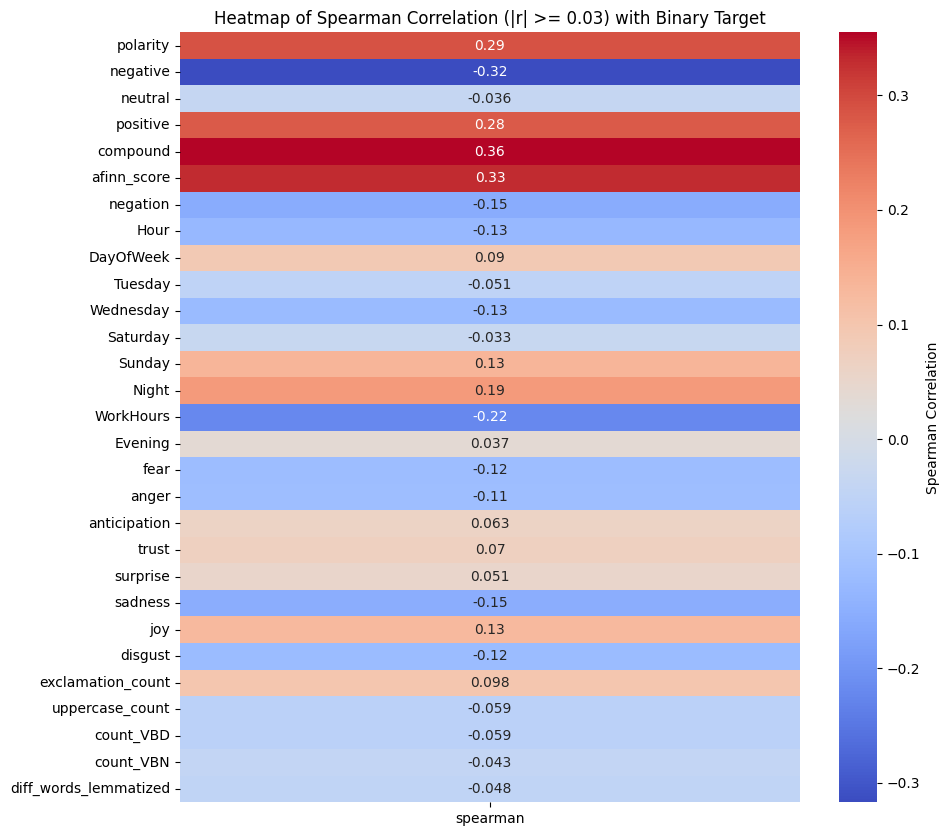

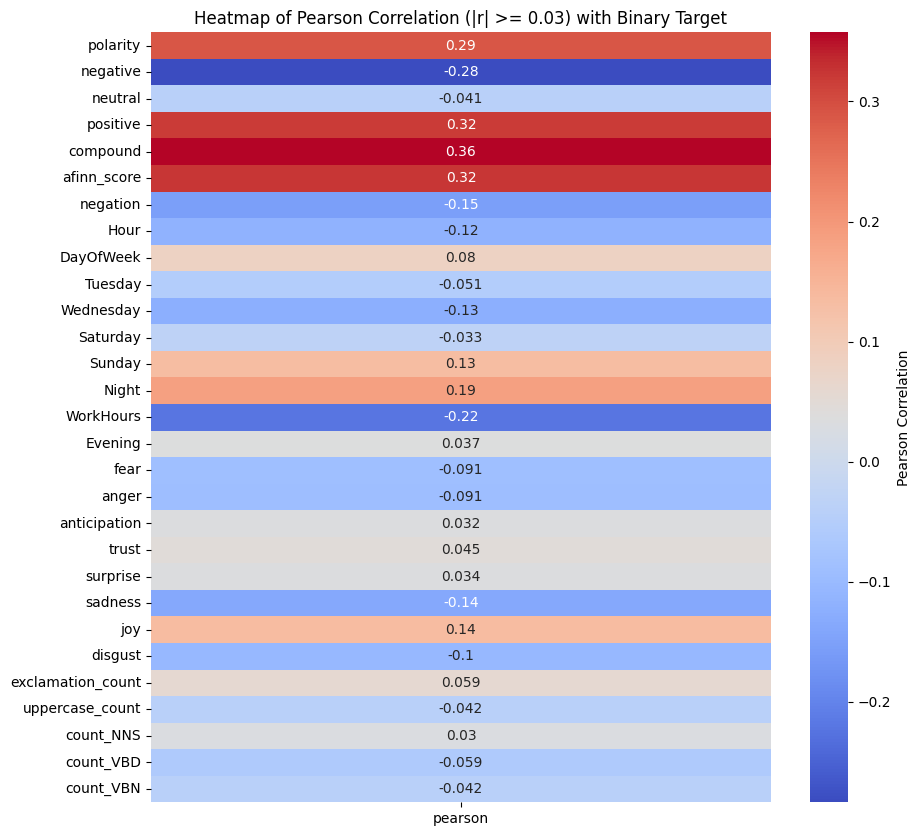

Index(['DayOfWeek', 'Evening', 'Hour', 'Night', 'Saturday', 'Sunday',
       'Tuesday', 'Wednesday', 'WorkHours', 'afinn_score', 'anger',
       'anticipation', 'compound', 'count_NNS', 'count_VBD', 'count_VBN',
       'diff_words_lemmatized', 'disgust', 'exclamation_count', 'fear', 'joy',
       'negation', 'negative', 'neutral', 'polarity', 'positive', 'sadness',
       'surprise', 'trust', 'uppercase_count'],
      dtype='object')

In [69]:
# Function to calculate Spearman correlation
def calculate_spearman_correlation(df, column, target):
    correlation, _ = spearmanr(df[column], target)
    return correlation

# Function to calculate Pearson correlation
def calculate_pearson_correlation(df, column, target):
    correlation, _ = pearsonr(df[column], target)
    return correlation

# Creating a DataFrame to store correlation results
feature_names = X.columns
correlations = pd.DataFrame(index=feature_names)

# Calculating Spearman and Pearson correlation for each feature
correlations['spearman'] = [calculate_spearman_correlation(X, feature, y) for feature in feature_names]
correlations['pearson'] = [calculate_pearson_correlation(X, feature, y) for feature in feature_names]

# Filter features with Spearman correlation greater than or equal to 0.04
selected_features_spearman = correlations[correlations['spearman'].abs() >= 0.03]

# Filter features with Pearson correlation greater than or equal to 0.04
selected_features_pearson = correlations[correlations['pearson'].abs() >= 0.03]

# Combine the selected features from both correlation methods
selected_features_combined = selected_features_spearman.index.union(selected_features_pearson.index)

# Creating heatmaps of Spearman and Pearson correlations
plt.figure(figsize=(10, 10))
sns.heatmap(selected_features_spearman[['spearman']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Spearman Correlation'})
plt.title('Heatmap of Spearman Correlation (|r| >= 0.03) with Binary Target')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(selected_features_pearson[['pearson']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Pearson Correlation'})
plt.title('Heatmap of Pearson Correlation (|r| >= 0.03) with Binary Target')
plt.show()

# Output the combined selected features
selected_features_combined